In [27]:
"""
In the following code we read the usearch output
"""
import os
"""
 query+target+id+alnlen+mism+opens+qlo+qhi+tlo+thi+evalue+bits+qrow+trow+qrowdots+tstrand+qstrand+qseq+tseq
"""
os.chdir("/home/thegillgroup/Alaksh/MySeq_Data_Analysis_Pipeline/Alaksh_QC/")
def readUsearchOutputTodf(filename):
    import pandas as pd
    df_usearch = pd.read_csv(filename,delimiter='\t',names=['query','target','id'\
                                                            ,'alnlen','mism','opens','qlo','qhi',\
                                                            'tlo','thi','evalue','bits','qrow',\
                                                            'trow','qrowdots','tstrand','qstrand','qseq','tseq'],) 
    return df_usearch[df_usearch.id > 80]
df_gRNA = readUsearchOutputTodf('BC_30_gRNA_usearch.txt')
df_HA = readUsearchOutputTodf('BC_30_HA_usearch.txt')
df_all = readUsearchOutputTodf('BC3_USEARCH_1.txt')


#df_isobutanol_usearch = readUsearchOutputTodf('Usearch_Output/CREATE_BC9_usearch.txt')
#df_isobutanol_usearch2 = readUsearchOutputTodf('Usearch_Output/CREATE_BC5_usearch.txt')

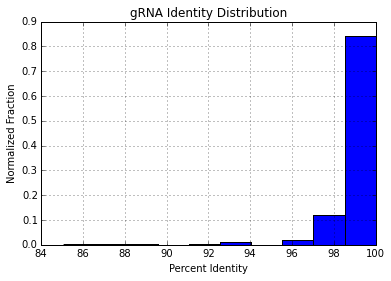

In [34]:
weights = np.ones_like(df_gRNA.id)/float(len(df_gRNA.id))

df_gRNA.id.hist(weights = weights)
plt.xlabel('Percent Identity')
plt.ylabel('Normalized Fraction')
plt.title('gRNA Identity Distribution')

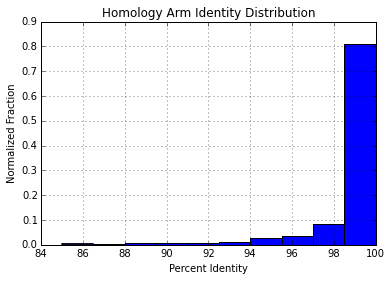

In [32]:
weights = np.ones_like(df_HA.id)/float(len(df_HA.id))

df_HA.id.hist(weights = weights)
plt.xlabel('Percent Identity')
plt.ylabel('Normalized Fraction')
plt.title('Homology Arm Identity Distribution')


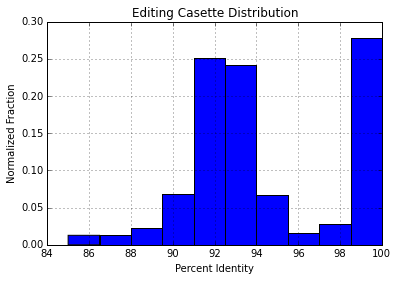

In [33]:
weights = np.ones_like(df_all.id)/float(len(df_all.id))

df_all.id.hist(weights = weights)
plt.xlabel('Percent Identity')
plt.ylabel('Normalized Fraction')
plt.title('Editing Casette Distribution')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
isobutanol_series = df_isobutanol_usearch.target.value_counts()
df_isobutanol_selection1 = isobutanol_series.to_frame()
df_isobutanol_selection1.columns = ['Selection1']
isobutanol_series2 = df_isobutanol_usearch2.target.value_counts()
df_isobutanol_selection2 = isobutanol_series2.to_frame()
df_isobutanol_selection2.columns = ['Selection2']
isobutanol_starting_series = df_starting_library.target.value_counts()

df_isobutanol = isobutanol_starting_series.to_frame()
df_isobutanol.columns = ['starting']
df_isobutanol['Gene'] = np.nan
df_isobutanol['Mutation'] = np.nan
df_isobutanol = df_isobutanol[['Gene','Mutation','starting']]

df_isobutanol = df_isobutanol.join(df_isobutanol_selection1)
df_isobutanol = df_isobutanol.join(df_isobutanol_selection2)


#Calculation of percentages
df_isobutanol['start_percent'] = df_isobutanol['starting']/df_isobutanol['starting'].sum()
df_isobutanol['post_selection_percent'] = df_isobutanol['Selection1']/df_isobutanol['Selection1'].sum()
df_isobutanol['post_selection_percent2'] = df_isobutanol['Selection2']/df_isobutanol['Selection2'].sum()

#Calculation of Enrichment
df_isobutanol['Enrichment'] = np.log2(df_isobutanol['post_selection_percent']/df_isobutanol['start_percent'])
df_isobutanol['Enrichment2'] = np.log2(df_isobutanol['post_selection_percent2']/df_isobutanol['start_percent'])

df_isobutanol['Weighted_Enrichment'] = (df_isobutanol['Selection1']*df_isobutanol['Enrichment'] + \
                                        df_isobutanol['Selection2']*df_isobutanol['Enrichment2'])/\
                                        (df_isobutanol['Selection1']+df_isobutanol['Selection2'])

df_isobutanol = df_isobutanol.sort('Enrichment',ascending=0)
df_isobutanol['Gene'] = df_isobutanol.index.str.split('_').str[0]
df_isobutanol['Mutation'] = df_isobutanol.index.str.split('_').str[1]

In [89]:
df_isobutanol_synonymous = df_isobutanol[df_isobutanol.Mutation.str[0] == df_isobutanol.Mutation.str[-1]]
mean = df_isobutanol_synonymous.Enrichment.mean()
stdev = df_isobutanol_synonymous.Enrichment.std()
df_Enriched = df_isobutanol[(df_isobutanol.Enrichment >= (mean+2*stdev))]
df_best = df_isobutanol_usearch[df_isobutanol_usearch.target == 'nusA_I464T_ATT/ACC99_11']

In [35]:
#df_100 = df_starting_library
import time
import pandas as pd
start = time.clock()
df_trace = pd.DataFrame(index=['.','A','T','C','G','-'])
for i in range(0,200):
    df_trace_temp = df_all.qrowdots.str[i].value_counts('.').to_frame()
    df_trace_temp.columns = [i]
    df_trace = df_trace.join(df_trace_temp)
print time.clock() - start
df_trace = df_trace.fillna(0)

27.962917


In [36]:
df_trace.loc['mismatch'] = df_trace.loc['A'] + df_trace.loc['T'] + df_trace.loc['C'] + df_trace.loc['G']

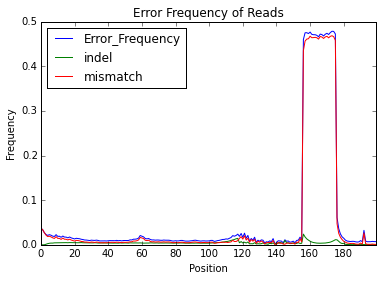

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
series = 1 - df_trace.loc['.']
series.plot(label='Error_Frequency',legend=True,xticks=np.arange(0, 200, 20.0))
series = df_trace.loc['-']
series.plot(label='indel',legend=True)
series = df_trace.loc['mismatch']
series.plot(label='mismatch',legend=True)
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Error Frequency of Reads')
plt.legend(loc='upper left')
plt.show()

In [31]:
print len(df_starting_library.loc[df_starting_library.id == 100])
print len(df_starting_library)

8517554
9438794


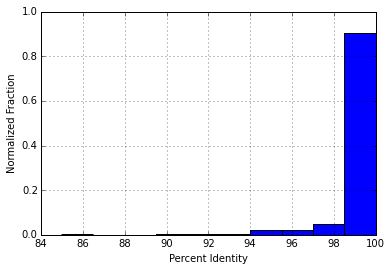

In [32]:
"""
Code for plotting a normalized Histogram
"""
weights = np.ones_like(df_starting_library.id)/float(len(df_starting_library.id))

df_starting_library.id.hist(weights = weights)
plt.xlabel('Percent Identity')
plt.ylabel('Normalized Fraction')

In [24]:
len(df_starting_library.loc[df_starting_library.id >= 95])

166185

In [26]:
len(df_starting_library.target.value_counts())

134522